<a href="https://colab.research.google.com/github/HumailShahzad/Price_Prediction_ANN/blob/main/HousePricePreditionANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
file = files.upload()
f=list(file.keys())[0]
df=pd.read_csv(f)

Saving kc_house_data.csv to kc_house_data (1).csv


In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


<Figure size 1200x800 with 0 Axes>

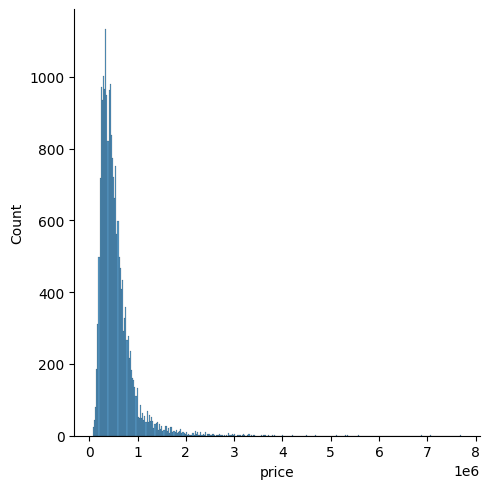

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(df['price'])

<Axes: xlabel='price', ylabel='sqft_living'>

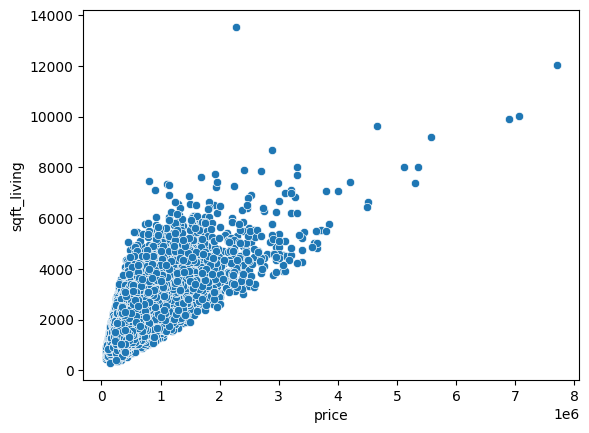

In [ ]:
sns.scatterplot(x='price',y='sqft_living',data=df)

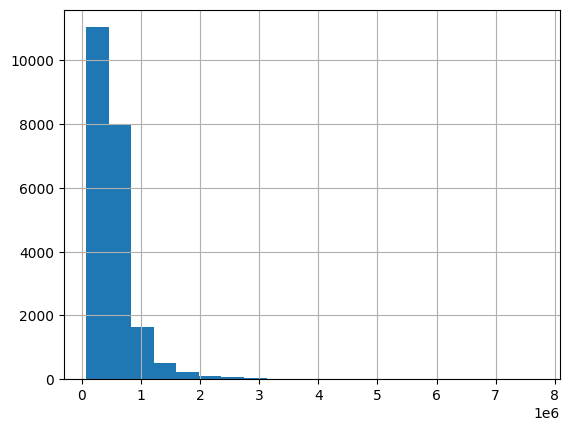

In [ ]:
df['price'].hist(bins=20)
plt.show()

Count of outliers in column 'price': 264
Percentage of outliers in column 'price':1.29%

Lower : -112500.0
Upper : 1027500.0

Data Outlier': [1040000. 1099880. 1088000. 1095000. 1072000. 1118000. 1030000. 1050000.
 1067000. 1095000. 1042500. 1120000. 1100000. 1100000. 1095000. 1029900.
 1050000. 1035480. 1127000. 1075000. 1062500. 1102030. 1050000. 1038000.
 1100000. 1125000. 1045000. 1085000. 1050000. 1101000. 1126000. 1050000.
 1065000. 1110000. 1049000. 1125000. 1125000. 1062000. 1100000. 1100000.
 1100000. 1075000. 1078000. 1060000. 1075000. 1055000. 1038000. 1045000.
 1075000. 1050000. 1088890. 1100000. 1050000. 1050000. 1035000. 1075000.
 1125000. 1050000. 1060000. 1100000. 1085000. 1050000. 1038000. 1070000.
 1122500. 1086000. 1098000. 1087500. 1100000. 1029000. 1110000. 1052000.
 1030000. 1100000. 1112500. 1058800. 1039000. 1028000. 1050000. 1035000.
 1100000. 1039000. 1060000. 1030000. 1038000. 1045000. 1065000. 1070000.
 1050000. 1112750. 1125000. 1035000. 1065000. 1110000. 1

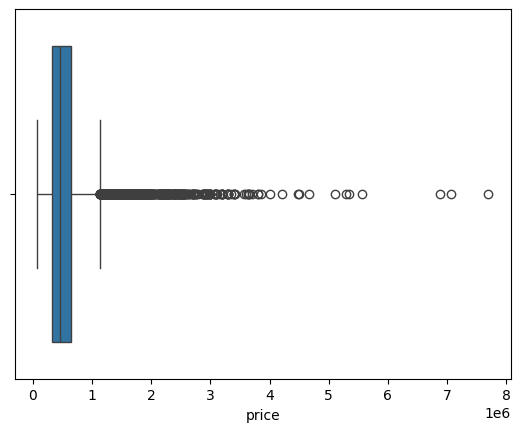

In [ ]:
#Checking Outliers
sns.boxplot(x='price',data=df)
columns = ['price']

for column in columns:
    column_data = df[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # find outlier
    outliers = column_data[(column_data < lower) | (column_data > upper)]

    # remove outlier
    df_no_outliers = df[(column_data >= lower) & (column_data <= upper)]

columns = ['price']
outlier_percentage = {}

for column in columns:
    column_data = df_no_outliers[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = column_data[(column_data < lower) | (column_data > upper)]
    outlier_percentage[column] = len(outliers) / len(column_data) * 100

# Display the outlier percentage for each column
for column, percentage in outlier_percentage.items():
    print(f"Count of outliers in column '{column}': {len(outliers)}")
    print(f"Percentage of outliers in column '{column}':{percentage:.2f}%")
    print()
    print(f"Lower : {lower}")
    print(f"Upper : {upper}")
    print()
    print(f"Data Outlier': {np.array(outliers)}")



<Axes: xlabel='price'>

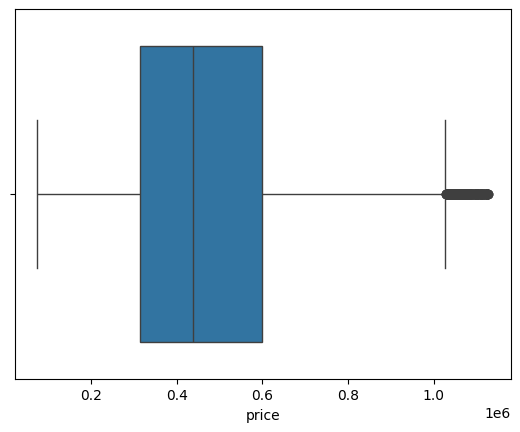

In [ ]:
sns.boxplot(x='price',data=df_no_outliers)


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

<Axes: xlabel='year', ylabel='price'>

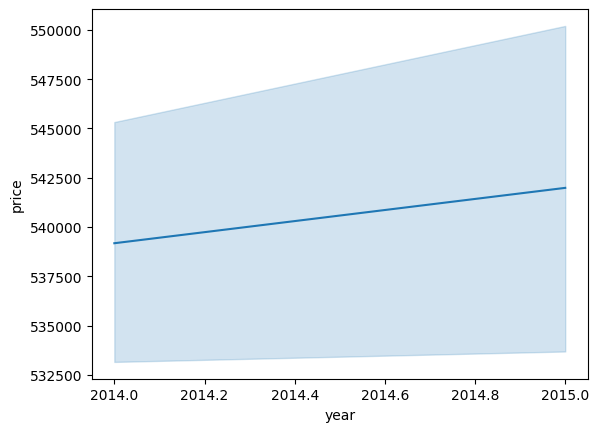

In [ ]:
sns.lineplot(x='year',y='price',data=df)


<Axes: xlabel='month', ylabel='price'>

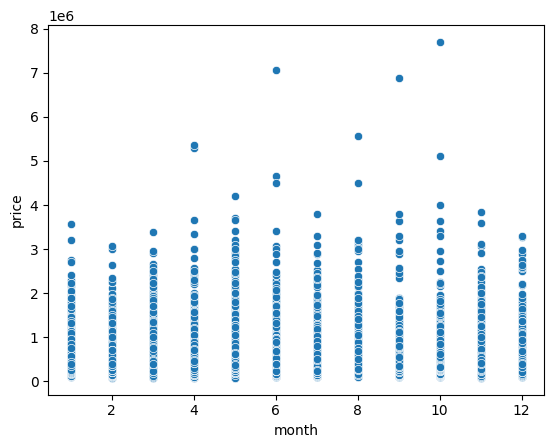

In [ ]:
sns.scatterplot(x='month',y='price',data=df)

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense




In [90]:
train_X, test_X, train_Y , test_Y=train_test_split(df.drop(['price','date'],axis=1),df['price'],test_size=0.3,random_state=42)
Scaler=MinMaxScaler()
train_X=Scaler.fit_transform(train_X)
test_X=Scaler.transform(test_X)

In [93]:
model=Sequential()
model.add(Dense(train_X.shape[1],activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


In [98]:
r=model.fit(train_X,train_Y,epochs=100,validation_data=(test_X,test_Y))

Epoch 1/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 78283325440.0000 - val_loss: 89591283712.0000
Epoch 2/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 79313461248.0000 - val_loss: 88639291392.0000
Epoch 3/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 82512355328.0000 - val_loss: 87649402880.0000
Epoch 4/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 73790062592.0000 - val_loss: 86653362176.0000
Epoch 5/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 71514275840.0000 - val_loss: 85636440064.0000
Epoch 6/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 73107464192.0000 - val_loss: 84657053696.0000
Epoch 7/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 74224607232.0000 - val_loss: 83649691648.0000
Epoch 8/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 73374892032.0000 - val_loss: 82706219008.0000
Epoch 9/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 69950078976.0000 - val_loss: 81671110656.0000
Epoch 10/100
473/473 ━━━━━━━━━━━━━━━━

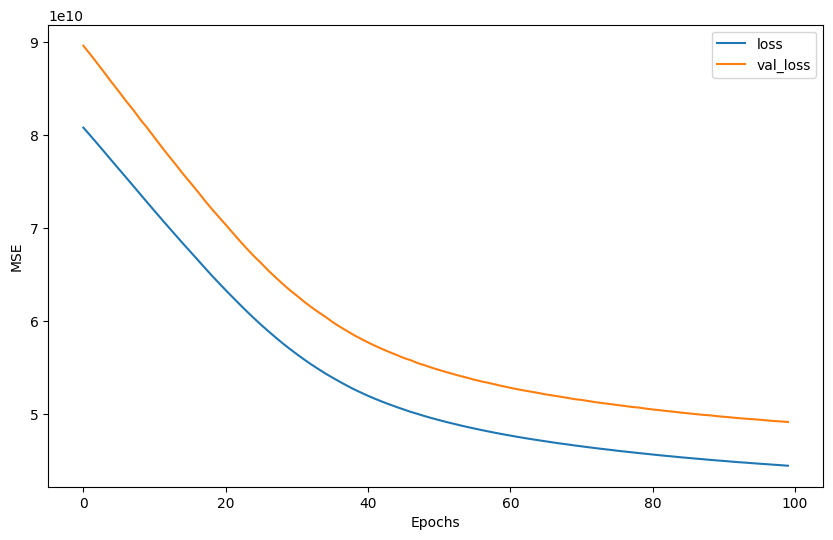

In [99]:
plt.figure(figsize=(10, 6))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()